![example](images/director_shot.jpeg)

# Microsoft New Movie Studio

**Authors:** Monique Hercules 
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

This project analyzes popular movies made by various studios to create a template to use to create a successful new movie studio for Microsoft. The creators of the new studio can use this information to predict the best actors, directors and writers to use to make a profitable movie studio. 

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

The creation of a new movie studio is a daunting task but with the data analysis from --- and profit projections. We can determine the first few movies we need to make to be profitable immediately, while building rapport in the movie studio industry. 

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [36]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
#December 20th I firgured out that the project proposal table was incorrect so I will probably have to change my question 
#But to prevent further complications I will run all the tables and get the info on all of them so I can compare it to the 
#Project proposal table 


In [38]:
movie_budgets_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz', index_col = 0)
movie_gross_df = pd.read_csv('data/zippeddata/bom.movie_gross.csv.gz')
rotten_tomatoes_movies_df = pd.read_csv('data/zippeddata/rt.movie_info.tsv.gz', delimiter = '\t')
rotten_tomatoes_reviews_df = pd.read_csv('data/zippeddata/rt.reviews.tsv.gz', encoding = 'unicode_escape', delimiter = '\t')
Imdb_movies_df = pd.read_csv('data/zippeddata/tmdb.movies.csv.gz', index_col = 0)
Imdb_title_principals_df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
Imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
Imdb_title_crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
Imdb_title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
Imdb_title_akas_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
Imdb_name_basics_df = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')



In [39]:
movie_budgets_df.head()#use this for first question. Merge teo tables together 

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [40]:
movie_gross_df.head()#Use this for first question 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [41]:
rotten_tomatoes_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [42]:
rotten_tomatoes_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [43]:
Imdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [44]:
Imdb_title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [45]:
Imdb_title_ratings_df.head()#Probably won't need 

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [46]:
Imdb_title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [47]:
Imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [48]:
Imdb_title_akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [49]:
Imdb_name_basics_df.head() #Probably won't need 

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [50]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [78]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [52]:
rotten_tomatoes_movies_df.info

<bound method DataFrame.info of         id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Acti

In [53]:
rotten_tomatoes_reviews_df.info

<bound method DataFrame.info of          id                                             review rating   fresh  \
0         3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1         3  It's an allegory in search of a meaning that n...    NaN  rotten   
2         3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3         3  Continuing along a line introduced in last yea...    NaN   fresh   
4         3             ... a perverse twist on neorealism...     NaN   fresh   
...     ...                                                ...    ...     ...   
54427  2000  The real charm of this trifle is the deadpan c...    NaN   fresh   
54428  2000                                                NaN    1/5  rotten   
54429  2000                                                NaN    2/5  rotten   
54430  2000                                                NaN  2.5/5  rotten   
54431  2000                                                NaN    3/5   fresh

In [54]:
rotten_tomatoes_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [55]:
Imdb_movies_df.info

<bound method DataFrame.info of                  genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
26512             [27, 18]  488143                en   
26513             [18, 53]  485975                en   
26514         [14, 28, 12]  381231                en   
26515      [10751, 12, 28]  366854                en   
26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2    

In [56]:

Imdb_title_principals_df.info

<bound method DataFrame.info of             tconst  ordering      nconst  category       job  \
0        tt0111414         1   nm0246005     actor       NaN   
1        tt0111414         2   nm0398271  director       NaN   
2        tt0111414         3   nm3739909  producer  producer   
3        tt0323808        10   nm0059247    editor       NaN   
4        tt0323808         1   nm3579312   actress       NaN   
...            ...       ...         ...       ...       ...   
1028181  tt9692684         1   nm0186469     actor       NaN   
1028182  tt9692684         2   nm4929530      self       NaN   
1028183  tt9692684         3  nm10441594  director       NaN   
1028184  tt9692684         4   nm6009913    writer    writer   
1028185  tt9692684         5  nm10441595  producer  producer   

                   characters  
0                 ["The Man"]  
1                         NaN  
2                         NaN  
3                         NaN  
4            ["Beth Boothby"]  
...    

In [57]:
Imdb_title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [58]:
Imdb_title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [59]:
Imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [60]:
Imdb_title_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [61]:
Imdb_name_basics_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [62]:
movie_budgets_df.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [63]:
movie_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [64]:
rotten_tomatoes_movies_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [65]:
rotten_tomatoes_reviews_df.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [66]:
Imdb_movies_df.columns 

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [67]:
Imdb_title_principals_df.columns 

Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')

In [68]:
Imdb_title_ratings_df.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [69]:
Imdb_title_crew_df.columns 

Index(['tconst', 'directors', 'writers'], dtype='object')

In [70]:
Imdb_title_basics_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [71]:
Imdb_title_akas_df.columns 

Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')

In [72]:
Imdb_name_basics_df.columns

Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

In [73]:
#You can merge the data frames movie budgets, rotten tomatoes reviews and rotten tomatoes movies 
rotten_tomatoes_overall_df = rotten_tomatoes_reviews_df.merge(rotten_tomatoes_movies_df, on='id')
rotten_tomatoes_overall_df.head(40)

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [74]:
movie_budgets_df = movie_budgets_df.rename(columns ={'movie': 'title'})
#Changing the name of the 'movie' to 'title' 

In [75]:
movie_budget_and_profit_df = movie_budgets_df.merge(movie_gross_df, on= 'title' )
movie_budget_and_profit_df.head()
#Merging the dataframes together for all the budgets and profits 

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000,2011
1,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,946400000,2015
2,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",BV,678800000.0,"1,369.5",2018
3,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",WB,229000000.0,428900000,2017
4,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Sony,200100000.0,680600000,2015


In [99]:
#Convert the merged dataframe budget columns into ints 
movie_budget_and_profit_df[movie_budget_and_profit_df.columns[2:]]=  movie_budget_and_profit_df[movie_budget_and_profit_df.columns[2:]].replace('[\$|,]','',regex= True)
print(movie_budget_and_profit_df[movie_budget_and_profit_df.columns[2:]])
                                 

     production_budget domestic_gross_x worldwide_gross   studio  \
0            410600000        241063875      1045663875       BV   
1            330600000        459005868      1403013963       BV   
2            300000000        678815482      2048134200       BV   
3            300000000        229024295       655945209       WB   
4            300000000        200074175       879620923     Sony   
...                ...              ...             ...      ...   
1242            135000           408015          429448     FoxS   
1243            120000          1597486         3090593      IFC   
1244            100000         22764410        41656474  WB (NL)   
1245            100000          1594798         2769782      A24   
1246             50000           391674          424149      IFC   

      domestic_gross_y foreign_gross  year  
0          241100000.0     804600000  2011  
1          459000000.0     946400000  2015  
2          678800000.0        1369.5  2018  
3  

In [96]:
movie_budget_and_profit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1247 non-null   object 
 1   title              1247 non-null   object 
 2   production_budget  1247 non-null   object 
 3   domestic_gross_x   1247 non-null   object 
 4   worldwide_gross    1247 non-null   object 
 5   studio             1246 non-null   object 
 6   domestic_gross_y   1245 non-null   float64
 7   foreign_gross      1086 non-null   object 
 8   year               1247 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 97.4+ KB


In [86]:
rotten_tomatoes_overall_df.isnull().sum()

id                  0
review           5563
rating_x        13517
fresh               0
critic           2722
top_critic          0
publisher         309
date                0
synopsis          132
rating_y           86
genre              87
director         5440
writer           9226
theater_date     1226
dvd_date         1226
currency        21122
box_office      21122
runtime           838
studio          14307
dtype: int64

In [106]:
movie_budget_and_profit_df['production_budget'] = movie_budget_and_profit_df['production_budget'].astype(str).astype(int)

In [105]:
movie_budget_and_profit_df['worldwide_gross'] = movie_budget_and_profit_df['worldwide_gross'].astype(str).astype(int)

In [110]:
movie_budget_and_profit_df['Profit'] = movie_budget_and_profit_df['worldwide_gross'] - movie_budget_and_profit_df['production_budget']
movie_budget_and_profit_df
# I created the profit variable because I wanted to find the most profitable movies. 

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,241100000.0,804600000,2011,635063875
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,BV,459000000.0,946400000,2015,1072413963
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,WB,229000000.0,428900000,2017,355945209
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Sony,200100000.0,680600000,2015,579620923
...,...,...,...,...,...,...,...,...,...,...
1242,"Apr 27, 2012",Sound of My Voice,135000,408015,429448,FoxS,408000.0,NaN,2012,294448
1243,"Jun 15, 2012",Your Sister's Sister,120000,1597486,3090593,IFC,1600000.0,NaN,2012,2970593
1244,"Jul 10, 2015",The Gallows,100000,22764410,41656474,WB (NL),22800000.0,20200000,2015,41556474
1245,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,A24,1600000.0,NaN,2017,2669782


In [112]:
movie_budget_and_profit_df.sort_values('Profit')

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit
107,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,BV,21400000.0,17600000,2011,-110450242
208,"Nov 24, 2010",The Nutcracker in 3D,90000000,195459,20466016,Free,195000.0,16000000,2010,-69533984
147,"Jan 13, 2017",Monster Trucks,125000000,33370166,61642798,Par.,33400000.0,31100000,2017,-63357202
137,"Jul 19, 2013",R.I.P.D.,130000000,33618855,79076678,Uni.,33600000.0,44700000,2013,-50923322
265,"Jan 16, 2015",Blackhat,70000000,8005980,19665004,Uni.,8000000.0,11600000,2015,-50334996
...,...,...,...,...,...,...,...,...,...,...
65,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,Uni.,417700000.0,891800000,2018,1135772799
25,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,BV,700100000.0,646900000,2018,1148258224
40,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Uni.,353000000.0,1163.0,2015,1328722794
21,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Uni.,652300000.0,1019.4,2015,1433854864


In [116]:
movie_budget_and_profit_df['Profit_Margin'] = (movie_budget_and_profit_df['worldwide_gross'] - movie_budget_and_profit_df['production_budget'])/movie_budget_and_profit_df['worldwide_gross']
movie_budget_and_profit_df.head()

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,241100000.0,804600000,2011,635063875,0.607331
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,BV,459000000.0,946400000,2015,1072413963,0.764364
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200,0.853525
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,WB,229000000.0,428900000,2017,355945209,0.542645
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Sony,200100000.0,680600000,2015,579620923,0.658944


In [132]:
movie_budget_and_profit_df['inflation_budget'] = (((2021 - movie_budget_and_profit_df['year'] * .068 )+1)*
                                                movie_budget_and_profit_df['production_budget'])
movie_budget_and_profit_df['profit_inflation_budget'] =  (((2021 - movie_budget_and_profit_df['year'] * .068 )+1)*
                                                movie_budget_and_profit_df['Profit'])
movie_budget_and_profit_df.head()

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,241100000.0,804600000,2011,635063875,0.607331,7.740845e+11,1.197255e+12
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,BV,459000000.0,946400000,2015,1072413963,0.764364,6.231744e+11,2.021479e+12
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200,0.853525,5.654328e+11,3.294841e+12
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,WB,229000000.0,428900000,2017,355945209,0.542645,5.654532e+11,6.709012e+11
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Sony,200100000.0,680600000,2015,579620923,0.658944,5.654940e+11,1.092574e+12


In [133]:
protfitable_movies = movie_budget_and_profit_df.loc[movie_budget_and_profit_df['Profit'] > 0 ]
most_profitable_movies = protfitable_movies.sort_values(by = ['profit_inflation_budget'], ascending = False)
most_profitable_movies.reset_index(inplace = True)
most_profitable_movies.head(10)

,index,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,BV,678800000.0,1369.5,2018,1748134200,0.853525,5.654328e+11,3.294841e+12
1,21,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Uni.,652300000.0,1019.4,2015,1433854864,0.869606,4.052707e+11,2.702788e+12
2,40,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Uni.,353000000.0,1163.0,2015,1328722794,0.874895,3.581462e+11,2.504616e+12
3,25,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,BV,700100000.0,646900000,2018,1148258224,0.851660,3.769552e+11,2.164210e+12
4,65,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,Uni.,417700000.0,891800000,2018,1135772799,0.869809,3.204119e+11,2.140677e+12
5,91,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,BV,400700000.0,875700000,2013,1122469910,0.882119,2.827674e+11,2.115986e+12
6,250,"Jul 10, 2015",Minions,74000000,336045770,1160336173,Uni.,336000000.0,823400000,2015,1086336173,0.936225,1.394885e+11,2.047722e+12
7,1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,BV,459000000.0,946400000,2015,1072413963,0.764364,6.231744e+11,2.021479e+12
8,26,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,BV,608600000.0,634200000,2018,1042520711,0.839037,3.769552e+11,1.964918e+12
9,30,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,BV,409000000.0,805800000,2013,1015392272,0.835444,3.770232e+11,1.914132e+12


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

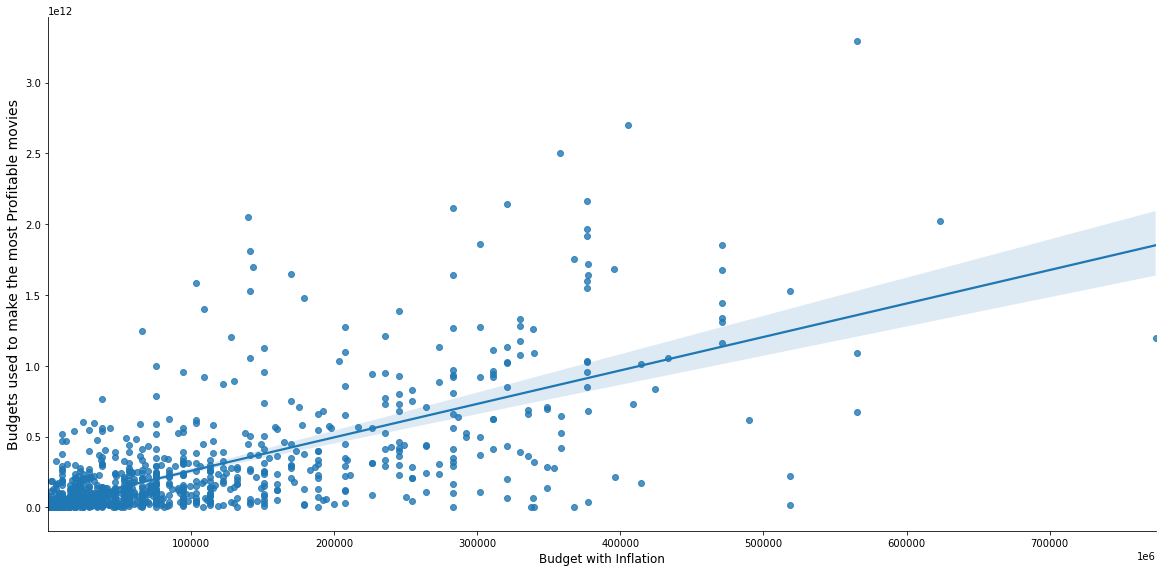

In [134]:
# Here you run your code to model the data
# Question 1 The most proftiable movies with inflation accounted for 
ax1 = sns.lmplot(x='inflation_budget', y ='profit_inflation_budget', data = most_profitable_movies, height = 8, aspect= 2 )
plt.xlabel('Budget with Inflation', fontsize = 12)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits = (6,6))
plt.ylabel('Budgets used to make the most Profitable movies', fontsize = 14)
plt.savefig ('BudgetVsProfit');

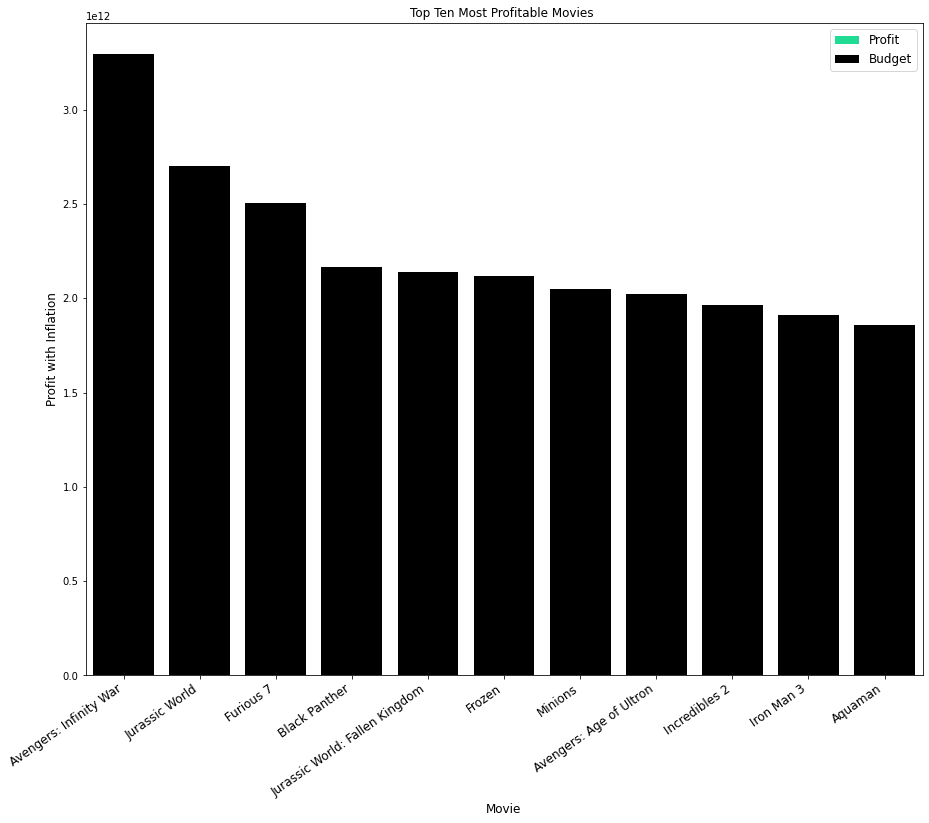

In [135]:
plt.figure(figsize = (15,12))
sns.barplot(x=most_profitable_movies.loc[0:10,'title'], y = most_profitable_movies.loc[0:10, 'profit_inflation_budget'],
           color = 'mediumspringgreen', label = 'Profit', ci = None)
sns.barplot(x= most_profitable_movies.loc[0:10,'title'], y = most_profitable_movies.loc[0:10, 'profit_inflation_budget'],
            color= 'black', label= 'Budget', ci= None)
plt.title('Top Ten Most Profitable Movies ')
plt.xlabel('Movie',fontsize = 12)
plt.ylabel('Profit with Inflation', fontsize = 12)
plt.xticks(rotation = 35, horizontalalignment = 'right', fontsize = 12)
plt.legend(fontsize = 12)
plt.savefig('tenmostprofitablemovies')


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***